In [4]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [6]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
print(train_labels)
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

(28, 28)
[5 0 4 ... 5 6 8]
784
Epoch 1/10
235/235 [==============================] - 7s 27ms/step - loss: 0.2935 - accuracy: 0.9093 - val_loss: 0.1287 - val_accuracy: 0.9608
Epoch 2/10
235/235 [==============================] - 7s 31ms/step - loss: 0.1014 - accuracy: 0.9688 - val_loss: 0.0912 - val_accuracy: 0.9720
Epoch 3/10
235/235 [==============================] - 8s 35ms/step - loss: 0.0654 - accuracy: 0.9797 - val_loss: 0.0862 - val_accuracy: 0.9738
Epoch 4/10
235/235 [==============================] - 7s 32ms/step - loss: 0.0447 - accuracy: 0.9855 - val_loss: 0.1095 - val_accuracy: 0.9658
Epoch 5/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0324 - accuracy: 0.9897 - val_loss: 0.1032 - val_accuracy: 0.9698
Epoch 6/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0244 - accuracy: 0.9927 - val_loss: 0.0730 - val_accuracy: 0.9800
Epoch 7/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0179 - accuracy: 0.9944 - val_loss

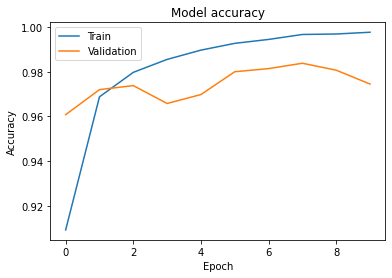

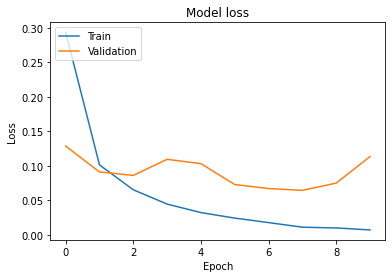

In [9]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

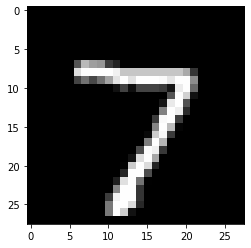

In [10]:

# Plot the first image in the test dataset
plt.imshow(test_images[0], cmap='gray')
plt.show()

In [11]:
image = test_data[0].reshape(1, dimData)
prediction = model.predict(image)
print("Model prediction: ", np.argmax(prediction))

1/1 [==============================] - 0s 91ms/step
Model prediction:  7


In [15]:
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
#train_data /=255.0
#test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(256, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

784
Epoch 1/10
235/235 [==============================] - 8s 31ms/step - loss: 0.3936 - accuracy: 0.8778 - val_loss: 0.2448 - val_accuracy: 0.9233
Epoch 2/10
235/235 [==============================] - 5s 22ms/step - loss: 0.2111 - accuracy: 0.9341 - val_loss: 0.1763 - val_accuracy: 0.9450
Epoch 3/10
235/235 [==============================] - 7s 29ms/step - loss: 0.1663 - accuracy: 0.9483 - val_loss: 0.1719 - val_accuracy: 0.9444
Epoch 4/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1433 - accuracy: 0.9554 - val_loss: 0.1467 - val_accuracy: 0.9524
Epoch 5/10
235/235 [==============================] - 6s 24ms/step - loss: 0.1262 - accuracy: 0.9607 - val_loss: 0.1352 - val_accuracy: 0.9583
Epoch 6/10
235/235 [==============================] - 5s 23ms/step - loss: 0.1148 - accuracy: 0.9641 - val_loss: 0.1265 - val_accuracy: 0.9625
Epoch 7/10
235/235 [==============================] - 5s 22ms/step - loss: 0.1047 - accuracy: 0.9673 - val_loss: 0.1054 - val_accuracy: 0.